<a href="https://colab.research.google.com/github/hamagami/is2024/blob/main/11_NMFwithFaceData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NMF with Face Data Example　(with sklearn)


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import NMF


In [9]:
# Load the Olivetti Faces dataset
faces_data = fetch_olivetti_faces(shuffle=True, random_state=42)
data = faces_data.data  # Flattened face images
images = faces_data.images  # Original shape (400 samples, 64x64)


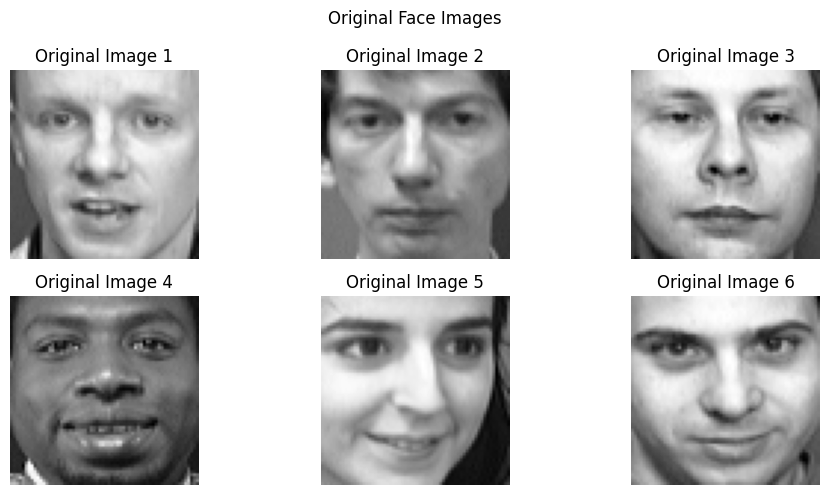

In [10]:
# Display some original face images
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"Original Image {i+1}")
    plt.axis('off')
plt.suptitle("Original Face Images")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1741: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


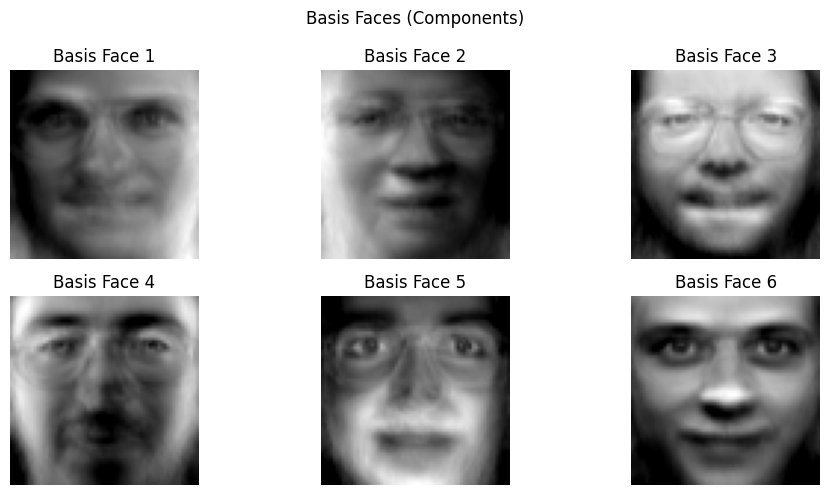

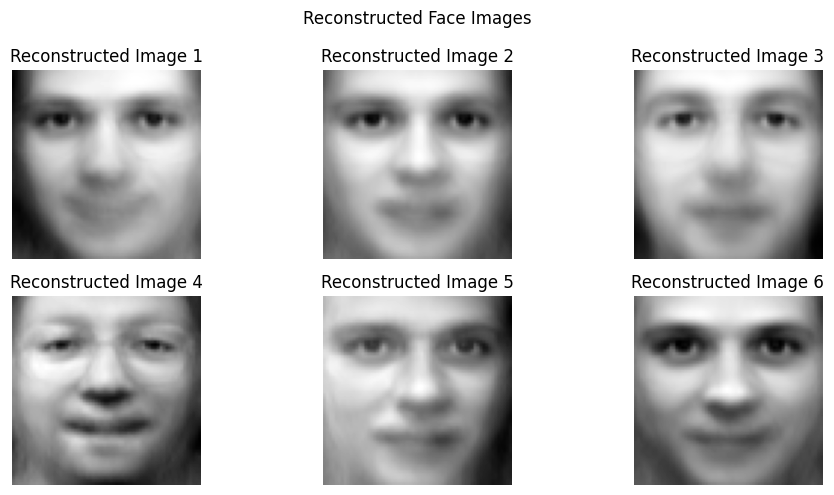

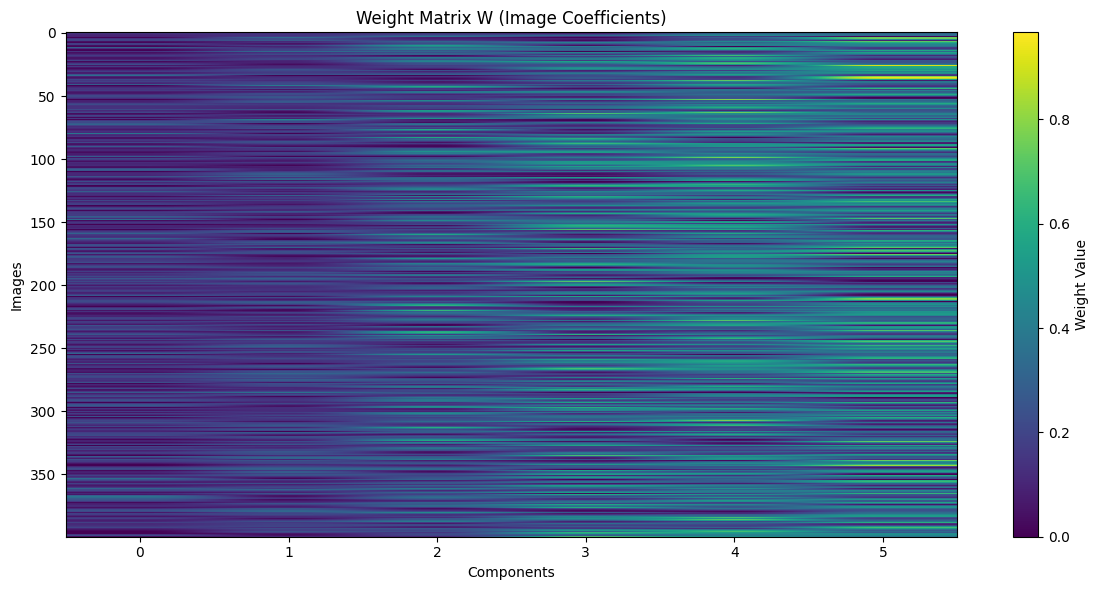

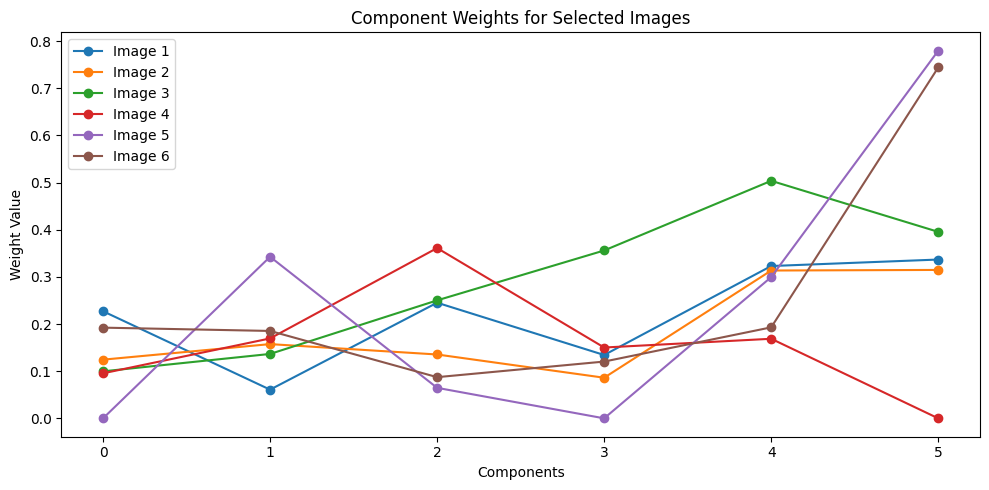

In [11]:
# Apply NMF for dimensionality reduction
num_components = 6
nmf = NMF(n_components=num_components, random_state=42)
W = nmf.fit_transform(data)  # Coefficients matrix (weights for images)
H = nmf.components_  # Basis matrix (basis faces)

# Display the basis components (basis faces)
plt.figure(figsize=(10, 5))
for i in range(num_components):
    plt.subplot(2, 3, i + 1)
    plt.imshow(H[i].reshape(64, 64), cmap='gray')
    plt.title(f"Basis Face {i+1}")
    plt.axis('off')
plt.suptitle("Basis Faces (Components)")
plt.tight_layout()
plt.show()

# Reconstruct the first 6 images using the NMF model
reconstructed_data = W @ H
reconstructed_images = reconstructed_data.reshape(-1, 64, 64)

# Display the reconstructed face images
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(reconstructed_images[i], cmap='gray')
    plt.title(f"Reconstructed Image {i+1}")
    plt.axis('off')
plt.suptitle("Reconstructed Face Images")
plt.tight_layout()
plt.show()

# Visualize the weight matrix (W)
plt.figure(figsize=(12, 6))
plt.imshow(W, aspect='auto', cmap='viridis')
plt.colorbar(label="Weight Value")
plt.title("Weight Matrix W (Image Coefficients)")
plt.xlabel("Components")
plt.ylabel("Images")
plt.tight_layout()
plt.show()

# Visualize the coefficients for individual images in W
plt.figure(figsize=(10, 5))
for i in range(6):
    plt.plot(W[i], marker='o', label=f"Image {i+1}")
plt.title("Component Weights for Selected Images")
plt.xlabel("Components")
plt.ylabel("Weight Value")
plt.legend()
plt.tight_layout()
plt.show()
